In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Valle calculate elevation for ASV

In [4]:
#FILE NAME RENAMED WRONG, IT IS ACTUALLY ASV!!!!
valle_asv = pd.read_csv('../data/output/0.25/valle_ASV_validation_table.csv', delimiter=',')

In [5]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,3,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,3,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,4,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,4,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,4,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,4,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,3,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,3,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516


In [6]:
valle_asv['PointLocation_Elevation'] = 66.016000

In [7]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422,66.016
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642,66.016
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414,66.016
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396,66.016
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089,66.016
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507,66.016
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015,66.016
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428,66.016
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540,66.016
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516,66.016


In [8]:
valle_asv = valle_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})

In [9]:
valle_asv['ASV_Elevation'] = valle_asv['PointLocation_Elevation'] + valle_asv['ASV_Depth']

In [10]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,ASV_Depth,PointLocation_Elevation,ASV_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422,66.016,63.830578
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642,66.016,63.720358
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414,66.016,63.788586
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396,66.016,63.740604
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089,66.016,63.779911
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507,66.016,63.848493
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015,66.016,63.947985
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428,66.016,63.972572
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540,66.016,64.106460
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516,66.016,64.537484


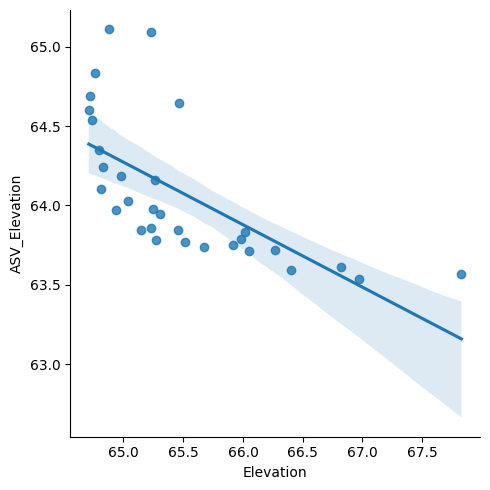

In [11]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=valle_asv)

## Valle calculate elevation for TIN

In [12]:
valle_TIN = pd.read_csv('../data/output/valle_TIN_vertailutaulukko.csv', delimiter=',')

In [13]:
valle_TIN['PointLocation_Elevation'] = 66.016000

In [14]:
valle_TIN['ASV_Elevation'] = valle_TIN['PointLocation_Elevation'] + valle_TIN['SAMPLE_1']

In [15]:
valle_TIN = valle_TIN.dropna()

In [16]:
valle_TIN

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation,ASV_Elevation
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-1.166303,66.016,64.849697
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.168352,66.016,64.847648
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.300130,66.016,64.715870
10,valle11,7757616.924,500059.411,64.722,69.925965,27.001551,89.026915,0.007,0.013,1.5,...,18.6.2023,10:39:38.000,7:39:38,2267,27596,2267,27598,-1.145411,66.016,64.870589
11,valle12,7757621.782,500058.338,64.710,69.926008,27.001523,89.015000,0.005,0.011,1.5,...,18.6.2023,10:40:20.000,7:40:20,2267,27638,2267,27640,-1.248946,66.016,64.767054
12,valle13,7757620.598,500056.306,64.797,69.925997,27.001470,89.102403,0.005,0.011,1.5,...,18.6.2023,10:40:55.000,7:40:55,2267,27672,2267,27675,-1.124886,66.016,64.891114
13,valle14,7757619.900,500052.496,64.832,69.925991,27.001370,89.137092,0.005,0.011,1.5,...,18.6.2023,10:41:51.000,7:41:51,2267,27729,2267,27731,-1.084201,66.016,64.931799
14,valle15,7757619.409,500051.109,64.981,69.925987,27.001334,89.286498,0.005,0.011,1.6,...,18.6.2023,10:42:14.000,7:42:14,2267,27751,2267,27753,-0.812823,66.016,65.203177
15,valle16,7757621.391,500047.147,65.249,69.926005,27.001231,89.554811,0.005,0.011,1.6,...,18.6.2023,10:42:39.000,7:42:39,2267,27777,2267,27779,-1.139966,66.016,64.876034
16,valle17,7757629.287,500046.620,65.037,69.926075,27.001217,89.342939,0.005,0.011,1.6,...,18.6.2023,10:43:12.000,7:43:12,2267,27810,2267,27812,-0.997400,66.016,65.018600


In [17]:
TIN_actual = valle_TIN['Elevation'].values.tolist()

In [18]:
TIN_predicted = valle_TIN['ASV_Elevation'].values.tolist()

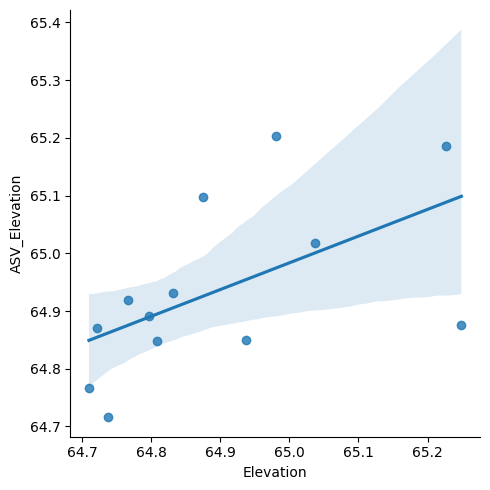

In [19]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=valle_TIN)

In [20]:
MSE = mean_squared_error(TIN_actual, TIN_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.15610608812005713


In [21]:
MAE = mean_absolute_error(TIN_actual, TIN_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.12129017000000339


In [22]:
# Compute max_error
MAXE = max_error(TIN_actual, TIN_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.37296589999999696


In [23]:
# Compute r2
R2 = r2_score(TIN_actual, TIN_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.1918876540065959


## Compute RMSE, MAE and MAXE, R2

In [24]:
valle_asv_actual = valle_asv['Elevation'].values.tolist()
valle_asv_actual

[66.016,
 66.272,
 65.981,
 65.67,
 65.275,
 65.144,
 65.307,
 64.937,
 64.808,
 64.737,
 64.722,
 64.71,
 64.797,
 64.832,
 64.981,
 65.249,
 65.037,
 65.233,
 65.515,
 66.05,
 65.455,
 65.916,
 65.268,
 65.227,
 65.464,
 64.875,
 64.766,
 66.82,
 67.828,
 66.975,
 66.404]

In [25]:
valle_asv_predicted = valle_asv['ASV_Elevation'].values.tolist()
valle_asv_predicted

[63.830578100000004,
 63.72035770000001,
 63.78858640000001,
 63.74060370000001,
 63.7799108,
 63.84849330000001,
 63.947985100000004,
 63.97257210000001,
 64.1064604,
 64.5374841,
 64.68916200000001,
 64.6009731,
 64.34641300000001,
 64.24220220000001,
 64.1866219,
 63.980989900000004,
 64.03128260000001,
 63.856369300000004,
 63.7733113,
 63.71426410000001,
 63.847183900000005,
 63.751977600000004,
 64.16118130000001,
 65.09284051,
 64.64334790000001,
 65.10829601,
 64.83184320000001,
 63.6112516,
 63.566888000000006,
 63.53687970000001,
 63.594449100000006]

In [26]:
MSE = mean_squared_error(valle_asv_actual, valle_asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.7838706318406874


In [27]:
MAE = mean_absolute_error(valle_asv_actual, valle_asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

1.4331780161290262


In [28]:
# Compute max_error
MAXE = max_error(valle_asv_actual, valle_asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

4.261111999999997


In [29]:
# Compute r2
R2 = r2_score(valle_asv_actual, valle_asv_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

-4.737712446007107


## Valle Elevations from ALS

In [30]:
valle_als = pd.read_csv('../data/output/0.25/valle_ALS_validation_table.csv', delimiter=',')

In [31]:
valle_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,2267,27216,2267,27218,90.10,90.87,90.534211,90.529521,19,0.283592
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,2267,27236,2267,27238,90.33,91.17,90.780000,90.763832,19,0.298170
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,2267,27268,2267,27270,90.09,90.89,90.543684,90.501440,19,0.274115
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,2267,27297,2267,27299,89.85,90.70,90.234615,90.273429,13,0.286668
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,2267,27322,2267,27325,89.35,90.12,89.697500,89.776826,12,0.299308
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,2267,27415,2267,27418,89.09,89.91,89.513500,89.484570,20,0.261348
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,2267,27443,2267,27446,89.28,90.08,89.665714,89.627307,14,0.294005
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,2267,27494,2267,27497,88.81,89.82,89.280625,89.283817,16,0.304846
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,2267,27531,2267,27533,88.68,89.72,89.158889,89.119383,18,0.285363
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,2267,27566,2267,27568,88.62,89.38,89.017143,89.018575,14,0.239834


In [32]:
valle_als = valle_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'StartGPSwe', 'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [33]:
valle_als = valle_als.rename(columns={"SAMPLE_4": "IDW", "SAMPLE_6": "Stdev"})

In [34]:
valle_als_actual = valle_als['Height'].values.tolist()

In [35]:
valle_als_predicted = valle_als['IDW'].values.tolist()

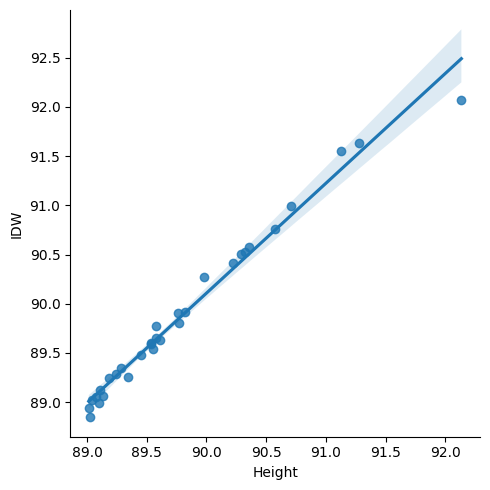

In [36]:
sns.lmplot(x="Height", y="IDW", data=valle_als)

# Compute RMSE, MAE, MAXE, R2

In [37]:
MSE = mean_squared_error(valle_als_actual, valle_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.16526257931156874


In [38]:
MAE = mean_absolute_error(valle_als_actual, valle_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.12614583495443576


In [39]:
# Compute max_error
MAXE = max_error(valle_als_actual, valle_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.427248066521301


In [40]:
# Compute r2
R2 = r2_score(valle_als_actual, valle_als_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.9507942822132884


## Nuorgam calculate Elevations from ALS

In [41]:
nuorgam_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_validation_table.csv', delimiter=',')

In [42]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,2266,573198,2266,573201,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,2266,573217,2266,573221,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,2266,573239,2266,573242,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,2266,573259,2266,573261,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,2266,573277,2266,573279,13.44,13.51,13.476667,13.468317,3,0.028674
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,2266,573298,2266,573300,14.09,15.01,14.519000,14.806798,10,0.293171
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,2266,573316,2266,573319,13.25,13.33,13.296000,13.292660,5,0.028000
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,2266,573336,2266,573339,12.74,12.84,12.774000,12.776020,5,0.037736
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,2266,573357,2266,573359,12.72,12.82,12.760000,12.745913,3,0.043205
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,2266,573381,2266,573384,12.98,13.09,13.045000,13.051075,4,0.043875


In [43]:
nuorgam_als = nuorgam_als.drop(columns=['Horizontal', 'VerticalSt', 'PDOP', 'StartGPSwe', 'StartGPSse', 'EndGPSweek', 'EndGPSseco'])

In [44]:
nuorgam_als = nuorgam_als.rename(columns={"SAMPLE_4": "IDW", "SAMPLE_6": "Stdev"})

In [45]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,HDOP,VDOP,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,SAMPLE_1,SAMPLE_2,SAMPLE_3,IDW,SAMPLE_5,Stdev
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.6,1.1,4,25,17.6.2023,18:13:01.000,15:13:01,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.6,1.1,5,25,17.6.2023,18:13:22.000,15:13:22,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.6,1.1,4,25,17.6.2023,18:13:43.000,15:13:43,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.6,1.1,3,25,17.6.2023,18:14:02.000,15:14:02,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.6,1.1,3,25,17.6.2023,18:14:20.000,15:14:20,13.44,13.51,13.476667,13.468317,3,0.028674
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.6,1.1,3,25,17.6.2023,18:14:41.000,15:14:41,14.09,15.01,14.519000,14.806798,10,0.293171
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.6,1.1,4,25,17.6.2023,18:14:59.000,15:14:59,13.25,13.33,13.296000,13.292660,5,0.028000
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.6,1.2,4,25,17.6.2023,18:15:19.000,15:15:19,12.74,12.84,12.774000,12.776020,5,0.037736
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.6,1.1,3,25,17.6.2023,18:15:40.000,15:15:40,12.72,12.82,12.760000,12.745913,3,0.043205
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.6,1.1,4,25,17.6.2023,18:16:04.000,15:16:04,12.98,13.09,13.045000,13.051075,4,0.043875


## Compute RMSE, MAE, MAXE, R2

In [46]:
nuorgam_als_actual = nuorgam_als['Elevation'].values.tolist()

In [47]:
nuorgam_als_predicted = nuorgam_als['IDW'].values.tolist()

In [48]:
MSE = mean_squared_error(nuorgam_als_actual, nuorgam_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.17681145003216284


In [49]:
MAE = mean_absolute_error(nuorgam_als_actual, nuorgam_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.11840849070220001


In [50]:
# Compute max_error
MAXE = max_error(nuorgam_als_actual, nuorgam_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.7277976715493999


In [51]:
# Compute r2
R2 = r2_score(nuorgam_als_actual, nuorgam_als_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.8837173799049066


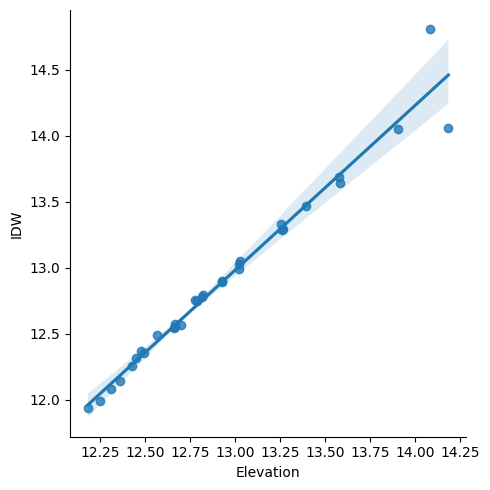

In [52]:
sns.lmplot(x="Elevation", y="IDW", data=nuorgam_als)

## Nuorgam ASV

In [53]:
nuorgam_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_validation_table.csv', delimiter=',')

In [54]:
nuorgam_asv['PointLocation_Elevation'] = 13.395000000000000

In [55]:
nuorgam_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,25,17.6.2023,18:13:01.000,15:13:01,2266,573198,2266,573201,-1.571486,13.395
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,25,17.6.2023,18:13:22.000,15:13:22,2266,573217,2266,573221,-1.582583,13.395
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,25,17.6.2023,18:13:43.000,15:13:43,2266,573239,2266,573242,-1.568659,13.395
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,25,17.6.2023,18:14:02.000,15:14:02,2266,573259,2266,573261,-1.579846,13.395
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,25,17.6.2023,18:14:20.000,15:14:20,2266,573277,2266,573279,-1.579843,13.395
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,25,17.6.2023,18:14:41.000,15:14:41,2266,573298,2266,573300,-1.607561,13.395
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,25,17.6.2023,18:14:59.000,15:14:59,2266,573316,2266,573319,-1.602496,13.395
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,25,17.6.2023,18:15:19.000,15:15:19,2266,573336,2266,573339,-1.590459,13.395
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,25,17.6.2023,18:15:40.000,15:15:40,2266,573357,2266,573359,-1.578435,13.395
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,25,17.6.2023,18:16:04.000,15:16:04,2266,573381,2266,573384,-1.568138,13.395


In [56]:
nuorgam_asv['ASV_Elevation'] = nuorgam_asv['PointLocation_Elevation'] + nuorgam_asv["SAMPLE_1"]

In [61]:
nuorgam_asv = nuorgam_asv.dropna()

## Compute errorss

In [63]:
nuorgam_asv_actual = nuorgam_asv['Elevation'].values.tolist()

In [64]:
nuorgam_asv_predicted = nuorgam_asv['ASV_Elevation'].values.tolist()

In [65]:
MSE = mean_squared_error(nuorgam_asv_actual, nuorgam_asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.1568474726087066


In [67]:
MAE = mean_absolute_error(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

1.0201863400000006


In [68]:
# Compute max_error
MAXE = max_error(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

2.3705827


In [69]:
# Compute r2
R2 = r2_score(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

-4.45726684508327


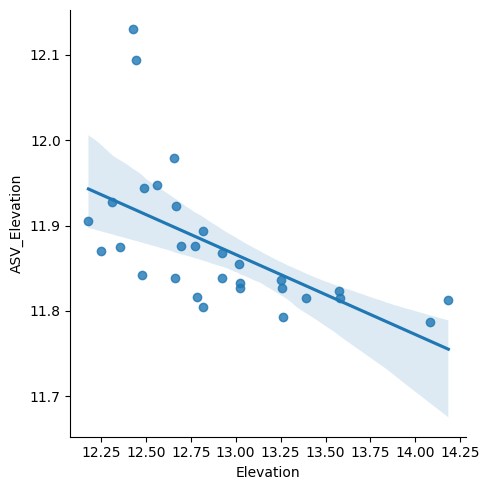

In [70]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=nuorgam_asv)

# Correlation testing

In [75]:
valle_corr_asv = pd.read_csv('../data/output/valle_asv_random_points.csv', delimiter=',')
#valle_corr_asv = pd.read_csv('../data/output/valle_asv_TIN_random_points.csv', delimiter=',')

In [76]:
valle_corr_asv

,id,SAMPLE_1
0,0,-2.912
1,1,-3.006
2,2,-3.052
3,3,-2.984
4,4,-3.020
...,...,...
280,280,-3.116
281,281,-1.306
282,282,-3.496
283,283,-3.257


In [77]:
valle_corr_als = pd.read_csv('../data/output/valle_als_random_points.csv', delimiter=',')

In [78]:
valle_corr_als

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,86.64,90.48,87.643778,87.799765,45,0.933960
1,1,86.81,89.87,87.712187,87.673477,32,1.110483
2,2,90.46,90.48,90.466667,90.465773,3,0.009428
3,3,87.13,90.33,88.054286,88.042293,7,1.433007
4,4,87.68,90.29,88.205833,88.153330,12,0.920756
...,...,...,...,...,...,...,...
280,280,84.37,86.86,86.400000,86.496730,6,0.909139
281,281,88.46,90.43,88.944800,88.921395,75,0.329628
282,282,86.85,90.47,89.293000,89.265995,10,1.246171
283,283,86.83,89.89,88.233333,88.280590,21,1.334293


In [79]:
valle_corr_asv["ALS_IDW"] = valle_corr_als["SAMPLE_4"]

In [80]:
valle_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,-2.912,87.799765
1,1,-3.006,87.673477
2,2,-3.052,90.465773
3,3,-2.984,88.042293
4,4,-3.020,88.153330
...,...,...,...
280,280,-3.116,86.496730
281,281,-1.306,88.921395
282,282,-3.496,89.265995
283,283,-3.257,88.280590


In [81]:
valle_corr_asv = valle_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [82]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW
0,0,-2.912,87.799765
1,1,-3.006,87.673477
2,2,-3.052,90.465773
3,3,-2.984,88.042293
4,4,-3.020,88.153330
...,...,...,...
280,280,-3.116,86.496730
281,281,-1.306,88.921395
282,282,-3.496,89.265995
283,283,-3.257,88.280590


In [83]:
valle_corr_asv["ASV_IDW"] = valle_corr_asv["ASV_IDW"].fillna(0)

In [100]:
valle_corr_asv["ASV_IDW"].corr(valle_corr_asv["ALS_IDW"])  

-0.11844148606390631

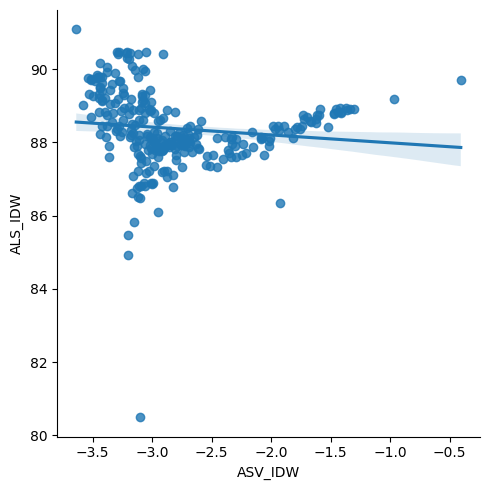

In [85]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=valle_corr_asv)

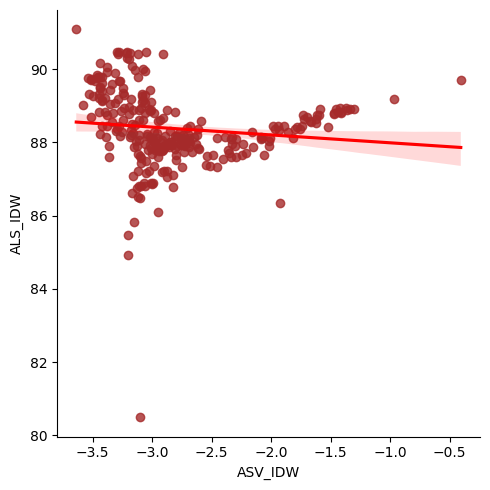

In [101]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW",
            data=valle_corr_asv, line_kws={'color': 'red'}, scatter_kws={'color': 'brown'})

Mitä korkeampi Elevation/Height arvo sen matalampi ASV syvyys. Eli jos matala elevation, syvyys syvempi.

In [113]:
nuorgam_corr_asv = pd.read_csv('../data/output/nuorgam_asv_0.05_random_points.csv', delimiter=',')
#nuorgam_corr_asv = pd.read_csv('../data/output/nuorgam_asv_TIN_random_points.csv', delimiter=',')


In [114]:
nuorgam_corr_als = pd.read_csv('../data/output/nuorgam_als_random_points.csv', delimiter=',')

In [115]:
nuorgam_corr_als

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,10.72,13.28,11.132000,11.021682,50,0.772145
1,1,11.70,13.27,11.894898,11.900562,49,0.398554
2,2,11.34,13.25,11.871566,11.798510,83,0.583410
3,3,10.66,13.30,11.103778,11.087159,45,0.854549
4,4,11.71,11.84,11.766111,11.766635,18,0.040844
...,...,...,...,...,...,...,...
295,295,10.91,13.26,11.384375,11.425324,64,0.750477
296,296,11.63,11.79,11.698852,11.700172,61,0.030087
297,297,11.68,13.21,11.871940,11.857780,67,0.292162
298,298,10.69,13.25,10.912022,10.872744,89,0.414125


In [116]:
nuorgam_corr_asv["ALS_IDW"] = nuorgam_corr_als["SAMPLE_4"]

In [117]:
nuorgam_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,NaN,11.021682
1,1,NaN,11.900562
2,2,NaN,11.798510
3,3,NaN,11.087159
4,4,NaN,11.766635
...,...,...,...
295,295,NaN,11.425324
296,296,NaN,11.700172
297,297,NaN,11.857780
298,298,NaN,10.872744


In [118]:
nuorgam_corr_asv = nuorgam_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [119]:
nuorgam_corr_asv["ASV_IDW"] = nuorgam_corr_asv["ASV_IDW"].fillna(0)

In [120]:
nuorgam_corr_asv

,id,ASV_IDW,ALS_IDW
0,0,0.0,11.021682
1,1,0.0,11.900562
2,2,0.0,11.798510
3,3,0.0,11.087159
4,4,0.0,11.766635
...,...,...,...
295,295,0.0,11.425324
296,296,0.0,11.700172
297,297,0.0,11.857780
298,298,0.0,10.872744


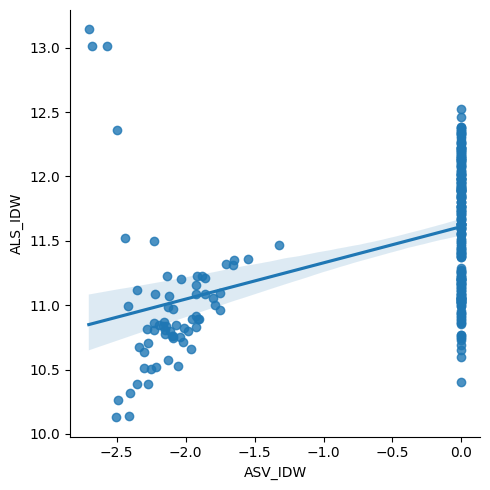

In [121]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=nuorgam_corr_asv)

In [122]:
nuorgam_corr_asv["ASV_IDW"].corr(nuorgam_corr_asv["ALS_IDW"])  

0.4474358028005311